밀집층
합성곱:특성을 그룹핑을 해서 만들어
커널 = 필터 = 가중치


케라스 합성곱 층
커널 사이즈 3,3 - 커널 사이즈는 항상,3*3,4*4 이런식을 가기 때문에 단수만 작성하여도 됨


패딩
바뀌지 않게 하는 것
패딩=same
조금이라도 특성을 더 모으기 위해

케라스의 풀링

스트라이드
특성을 더 잘가져오기 위해서 컨볼루션 사용
컨볼루션이 중요함


YOLO
라이브러리화가 잘되어 있음







*배치 사이즈 : 차원을 바꿈

In [1]:
from tensorflow import keras
(X_train,y_train),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

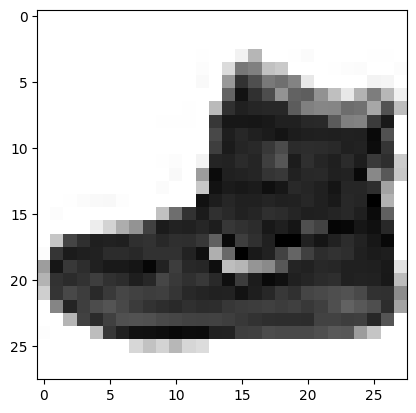

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray_r')
plt.show()

In [4]:
# conv2d -- 3차원
# 데이터를 -3 차원 형태로 변경

temp = X_train.reshape(-1,28,28,1)
temp.shape

(60000, 28, 28, 1)

In [5]:
import numpy as np
print(X_train.shape)
temp = np.expand_dims(X_train,axis=-1)
print(temp.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [6]:
X_train_scaled = np.expand_dims(X_train, axis=-1) / 255.0
X_test_scaled = np.expand_dims(X_test, axis=-1) / 255.0
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# conv2d -- 3차원
# 데이터를 -3 차원 형태로 변경

temp = X_train.reshape(-1, 28, 28, 1)
temp.shape

(60000, 28, 28, 1)

In [8]:
import numpy as np
print(X_train.shape)
temp = np.expand_dims(X_train, axis=-1)
print(temp.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [9]:
X_train_scaled = np.expand_dims(X_train, axis=-1) / 255.0
X_test_scaled = np.expand_dims(X_test, axis=-1) / 255.0
X_train_scaled.shape, X_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

합성곱 신경망

In [10]:
# 디자인 패턴 c - p - c - p - fc - d - fc
# 449 페이

model = keras.Sequential([
    # 모든지 첫번째 층은 입력 데이터와 연관되어 있어 입력 데이터를 지정해줘야함
    keras.layers.Conv2D(32,3,activation='relu',padding='same', input_shape = (28,28,1)) ,   # same 패딩 적용,
    # default는 valid로 패딩 적용 안함 그럼 가로세로 양 옆이 줄어서 26*26이
    # 마지막 1은 스트라이드
    # 그다음부터는 출력만 지정
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(64,3,activation='relu',padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    # 나머지 값들을 변경가능하지만 주로 사용되는 값들이 정해져있는 반면
    # Dense의 맨 앞 변수는 클래스의 개수로 지정되어 있다.
    # 알고자 하는 성격에 맞춰 지정해야 함
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

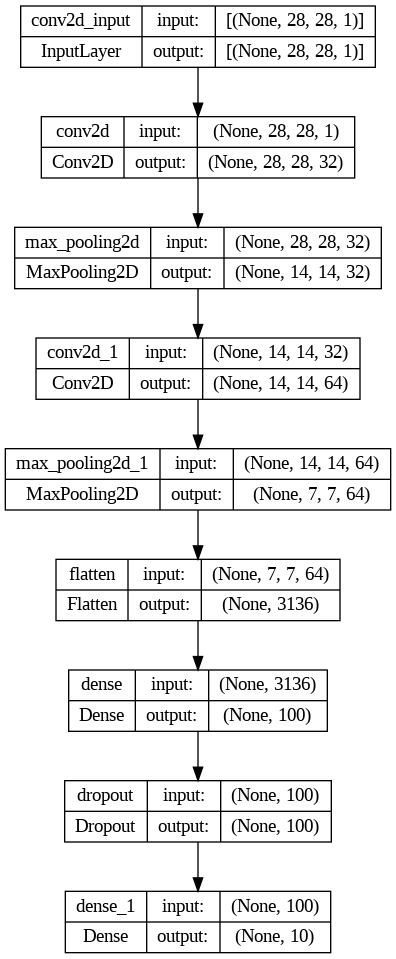

In [11]:
keras.utils.plot_model(model, show_shapes=True)

In [12]:
# 학습
# 컴파일
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
# callback
ealy_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
# fit
hist = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2,callbacks = [checkpoint_cb, ealy_stopping])
# 평가
best_model = keras.models.load_model('best_model.keras')
best_model.evaluate(X_test_scaled, y_test)

Epoch 1/100
1500/1500 [==============================] - 61s 40ms/step - loss: 0.5142 - accuracy: 0.8151 - val_loss: 0.3162 - val_accuracy: 0.8819
Epoch 2/100
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3386 - accuracy: 0.8783 - val_loss: 0.2899 - val_accuracy: 0.8920
Epoch 3/100
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2878 - accuracy: 0.8966 - val_loss: 0.2602 - val_accuracy: 0.9025
Epoch 4/100
1500/1500 [==============================] - 61s 40ms/step - loss: 0.2586 - accuracy: 0.9062 - val_loss: 0.2449 - val_accuracy: 0.9109
Epoch 5/100
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2304 - accuracy: 0.9146 - val_loss: 0.2485 - val_accuracy: 0.9079
Epoch 6/100
1500/1500 [==============================] - 59s 40ms/step - loss: 0.2115 - accuracy: 0.9213 - val_loss: 0.2214 - val_accuracy: 0.9202
Epoch 7/100
1500/1500 [==============================] - 61s 41ms/step - loss: 0.1959 - accuracy: 0.9271 - val_loss: 0

[0.23674757778644562, 0.9133999943733215]

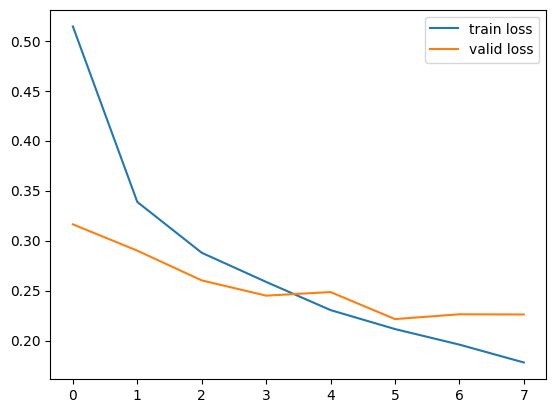

In [13]:
# 학습결과 시각화
# 학습결과 시각화
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'valid loss')
plt.legend()
plt.show()

In [14]:
# 28 28 저해상도의 이미지를 판별하는 모델링이 완성
# 샘플링이미지의 클래스별 이미지 확인
# 실제 구글에서 해당 이미지 다운로드 해서...우리 모델로 예측했을때 잘 맞추는 지 확인

In [15]:
np.where(y_train==0)[0]

array([    1,     2,     4, ..., 59974, 59985, 59998])

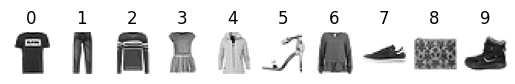

In [16]:
for i in range(10):
  index = np.where(y_train == i)[0][0]
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[index],cmap='gray_r')
  plt.axis('off')
  plt.title(i)
plt.show()

In [17]:
from PIL import Image

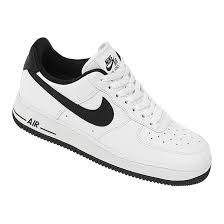

In [23]:
Image.open('/content/images.jpg')

In [24]:
import cv2
img = cv2.imread('/content/images.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
resize_img = cv2.resize(img, (28,28))
sample_scaled = np.expand_dims(resize_img, axis=-1) / 255.0
sample_scaled = np.expand_dims(sample_scaled, axis=0)
sample_scaled.shape

(1, 28, 28, 1)

In [25]:
result = best_model.predict(sample_scaled)
np.argmax(result)

1/1 [==============================] - 0s 112ms/step


8

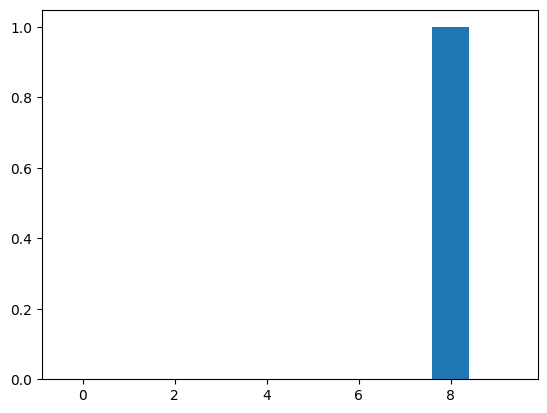

In [26]:
plt.bar(range(10), result[0])
plt.show()